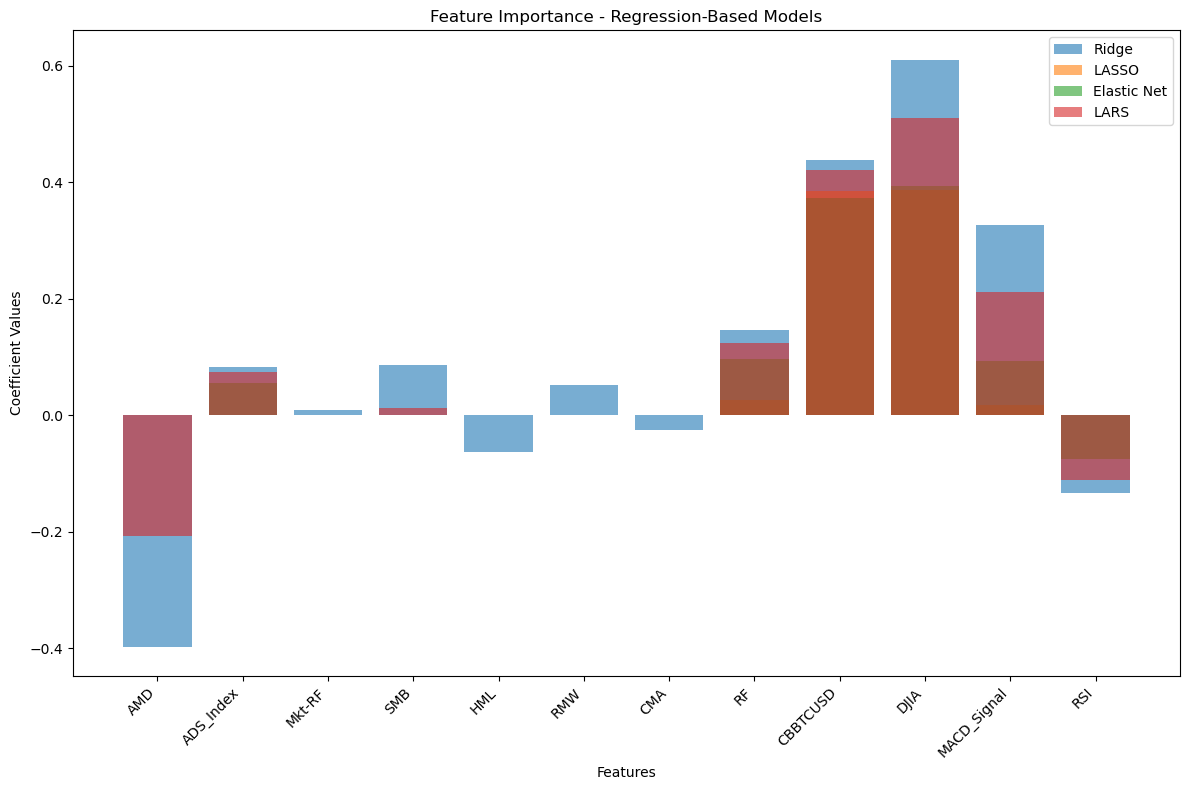


Selected Features by Each Regression Method:
Ridge: ['AMD', 'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal', 'RSI']
LASSO: ['RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal']
Elastic Net: ['ADS_Index', 'RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal', 'RSI']
LARS: ['AMD', 'ADS_Index', 'SMB', 'RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal', 'RSI']


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars
from statsmodels.api import OLS
from statsmodels.tools import add_constant

# Load Data
df = pd.read_csv('./DataStandardized.csv', index_col=0)
target_column = 'NVDA'
y = df[target_column]
X = df.drop(columns=[target_column])

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature selection process
features_to_remove = ['SMA', 'EMA', 'NASDAQCOM', 'SP500', 'CBETHUSD', 'OBV', 'AVGO', 'QCOM', 'MACD', 'AAPL', 'INTC']
x_train_reduced = x_train.drop(features_to_remove, axis=1, errors='ignore')

# Ridge Regression
ridge = Ridge(alpha=0.1, fit_intercept=False)
ridge.fit(x_train_reduced, y_train)
ridge_coef = ridge.coef_

# LASSO Regression
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(x_train_reduced, y_train)
lasso_coef = lasso.coef_

# Elastic Net
elastic_net = ElasticNet(alpha=0.1, fit_intercept=False)
elastic_net.fit(x_train_reduced, y_train)
elastic_net_coef = elastic_net.coef_

# Least Angle Regression (LARS)
lars = Lars(n_nonzero_coefs=8)
lars.fit(x_train_reduced, y_train)
lars_coef = lars.coef_

# Visualize the coefficients of regression-based models
plt.figure(figsize=(12, 8))
features = x_train_reduced.columns

plt.bar(features, ridge_coef, alpha=0.6, label='Ridge')
plt.bar(features, lasso_coef, alpha=0.6, label='LASSO')
plt.bar(features, elastic_net_coef, alpha=0.6, label='Elastic Net')
plt.bar(features, lars_coef, alpha=0.6, label='LARS')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Coefficient Values")
plt.xlabel("Features")
plt.title("Feature Importance - Regression-Based Models")
plt.legend()
plt.tight_layout()
plt.show()

# Print selected features for each model
ridge_selected = [features[i] for i in range(len(ridge_coef)) if ridge_coef[i] != 0]
lasso_selected = [features[i] for i in range(len(lasso_coef)) if lasso_coef[i] != 0]
elastic_selected = [features[i] for i in range(len(elastic_net_coef)) if elastic_net_coef[i] != 0]
lars_selected = [features[i] for i in range(len(lars_coef)) if lars_coef[i] != 0]

print("\nSelected Features by Each Regression Method:")
print(f"Ridge: {ridge_selected}")
print(f"LASSO: {lasso_selected}")
print(f"Elastic Net: {elastic_selected}")
print(f"LARS: {lars_selected}")

# Save selected features for further analysis
selected_features = df[['NVDA'] + ridge_selected]  # Example: Using Ridge-selected features
output_csv_path = './DataSelected.csv'
selected_features.to_csv(output_csv_path, index=False)


In [8]:
# Feature selection results
ridge_features = ['AMD', 'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal', 'RSI']
lasso_features = ['RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal']
elastic_net_features = ['ADS_Index', 'RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal', 'RSI']
lars_features = ['AMD', 'ADS_Index', 'SMB', 'RMW', 'RF', 'CBBTCUSD', 'DJIA', 'MACD_Signal', 'RSI']

# Combine all features
all_features = set(ridge_features + lasso_features + elastic_net_features + lars_features)

# Create a summary table
data = []
for feature in all_features:
    data.append({
        'Feature': feature,
        'Ridge': '✔' if feature in ridge_features else '',
        'LASSO': '✔' if feature in lasso_features else '',
        'Elastic Net': '✔' if feature in elastic_net_features else '',
        'LARS': '✔' if feature in lars_features else ''
    })

# Convert to DataFrame
table = pd.DataFrame(data)

# Sort by feature name for readability
table = table.sort_values(by='Feature').reset_index(drop=True)

# Display the table
print(table)

# Optionally save the table to a CSV file
output_csv_path = './feature_selection_summary.csv'
table.to_csv(output_csv_path, index=False)
print(f"Feature selection summary saved to {output_csv_path}")

        Feature Ridge LASSO Elastic Net LARS
0     ADS_Index     ✔                 ✔    ✔
1           AMD     ✔                      ✔
2      CBBTCUSD     ✔     ✔           ✔    ✔
3           CMA     ✔                       
4          DJIA     ✔     ✔           ✔    ✔
5           HML     ✔                       
6   MACD_Signal     ✔     ✔           ✔    ✔
7        Mkt-RF     ✔                       
8            RF     ✔     ✔           ✔    ✔
9           RMW     ✔                      ✔
10          RSI     ✔                 ✔    ✔
11          SMB     ✔                      ✔
Feature selection summary saved to ./feature_selection_summary.csv
